In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Tratamento dos dados

In [2]:
# Transforma o país de determinado continente em um número

def pais_para_numero(pais) -> int:

    continente_numeros = {
        "South America": range(1, 10),
        "North America": range(10, 20),
        "Europe": range(20, 40),
        "Africa": range(40, 60),
        "Asia": range(60, 80),
        "Oceania": range(80, 90)
    }

    paises_por_continente = {
        "South America": [
            "Brazil", "Argentina", "Uruguay", "Paraguay", "Chile",
            "Bolivia", "Peru", "Ecuador", "Colombia"
        ],
        "North America": [
            "United States", "Canada", "Mexico", "Cuba", "Jamaica",
            "Honduras", "Guatemala", "Haiti", "Dominican Republic", "Belize"
        ],
        "Europe": [
            "Germany", "France", "Spain", "Italy", "United Kingdom",
            "Portugal", "Sweden", "Norway", "Russia", "Netherlands",
            "Belgium", "Austria", "Greece", "Switzerland", "Denmark", "Finland",
            "Poland", "Ukraine", "Romania", "Hungary"
        ],
        "Africa": [
            "Nigeria", "South Africa", "Egypt", "Angola", "Morocco",
            "Algeria", "Ethiopia", "Kenya", "Ghana", "Mozambique",
            "Sudan", "Somalia", "Namibia", "Tunisia", "Uganda", "Rwanda",
            "Senegal", "Cameroon", "Botswana", "Zimbabwe"
        ],
        "Asia": [
            "China", "India", "Japan", "South Korea", "Indonesia",
            "Pakistan", "Philippines", "Vietnam", "Thailand", "Malaysia",
            "Saudi Arabia", "Iran", "Israel", "Qatar", "Iraq",
            "Turkey", "Afghanistan", "Bangladesh", "Kazakhstan", "Nepal"
        ],
        "Oceania": [
            "Australia", "New Zealand", "Fiji", "Papua New Guinea", "Samoa",
            "Tonga", "Vanuatu", "Kiribati", "Micronesia", "Palau"
        ]
    }
     
    # Busca o continente e atribui o número correspondente
    for continente, paises in paises_por_continente.items():
        if(pais in paises):
            indice = paises.index(pais)
            return int(continente_numeros[continente][indice]) # Retorna o indice da lista de acordo com o range do continente.

In [3]:
def converter_valores(valor) -> float:
   
    
    #valor_num = valor_num.lower()  # Garantir que a string seja minúscula

    """
    Converte uma string como '3k', '4.3m' ou '6b' em valores numéricos.
    - 'k' representa mil (multiplica por 1.000)
    - 'm' representa milhão (multiplica por 1.000.000)
    O resultado para 
        3k = 3000.0
        4.3m = 43000000.0
        6b = 6000000000.0
    """

    if 'k' in valor:
        return round(float(valor[:-1]) * 1_000, 1)
    elif 'm' in valor:
        return round(float(valor[:-1]) * 1_000_000, 1)
    elif 'b' in valor:
        return round(float(valor[:-1]) * 1_000_000_000, 1)
    else:
        # Caso não contenha 'k' ou 'm', retorna o número como está
        return 0.0 if valor == '' else float(valor)
    

 # Recebe a string referente a uma porcentagem, '2.34% e converte para 234
def taxa_engajamento(taxa) -> float: 
    if('%' in taxa):
        return  float(taxa[:-1]) / 100

In [4]:
def converte_influence_score_para_classe_numer(classe) -> int:
    if(classe == 'alto'):
        return 3
    elif(classe == 'medio'):
        return 2
    else:
        return 1

In [5]:
df_insta = pd.read_csv("top_insta_influencers_data.csv")

In [6]:
df_insta.head(5)

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [7]:
df_insta = df_insta.dropna(how='any', axis=0)

In [8]:
# Converte a coluna country para valores numéricos

df_insta['country'] = df_insta.apply(lambda row: pais_para_numero(row['country']), axis=1)


In [9]:
df_insta['country'].unique()

array([22., 10., 11.,  1., 29., 24., 61.,  3., 75., 64.,  9., 21., 80.,
       23., nan, 33., 26., 12., 20., 28.])

In [10]:
# Transforma as colunas que representam milhares na forma numéricas

df_insta['posts'] = df_insta.apply(lambda row: converter_valores(row['posts']), axis=1)
df_insta['followers'] = df_insta.apply(lambda row: converter_valores(row['followers']), axis=1)
df_insta['avg_likes'] = df_insta.apply(lambda row: converter_valores(row['avg_likes']), axis=1)
df_insta['new_post_avg_like'] = df_insta.apply(lambda row: converter_valores(row['new_post_avg_like']), axis=1)
df_insta['total_likes'] = df_insta.apply(lambda row: converter_valores(row['total_likes']), axis=1)

df_insta['60_day_eng_rate'] = df_insta.apply(lambda row: taxa_engajamento(row['60_day_eng_rate']), axis=1)

#### Retirar as colunas 'channel_info'

In [11]:
df = df_insta.drop(['channel_info'], axis=1)

# Salva o dataframe

In [12]:
# Aqui vamos definir faixa de valores para a coluna 'influence_score'.
 
bins = [ df['influence_score'].quantile(0.4) ,df['influence_score'].quantile(0.6),100]
#bins = [0, 20, 50, 100]  # Intervalos (ajuste conforme necessário)
labels = ['baixo', 'alto']

df['influence_s'] =  pd.cut(df['influence_score'], bins=bins, labels=labels)
df = df.drop(['influence_score'], axis=1)

df['influence_s'] =  df.apply(lambda row: converte_influence_score_para_classe_numer(row['influence_s']), axis=1)

In [13]:
df.to_csv('insta_influencers.csv', index=False)

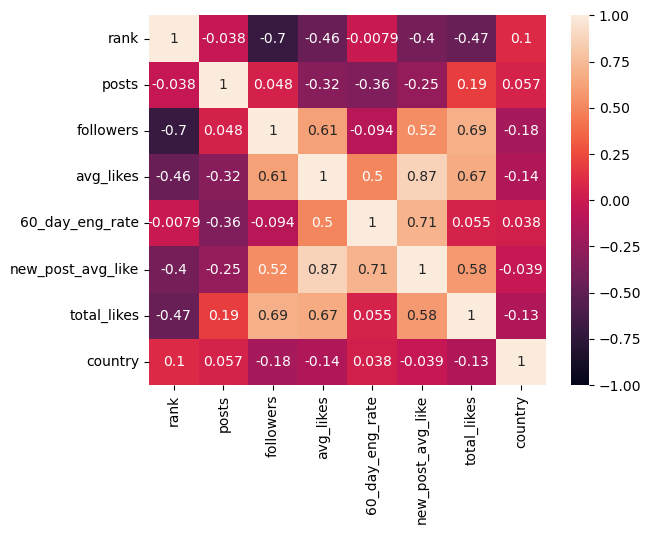

In [14]:
# Realiza o drop para visualizar a matriz de correlação entre as variáveis exeto a variável 'influence_score'
sns.heatmap(df.drop(['influence_s'], axis=1).corr(), annot=True, vmin=-1, vmax=1)
plt.show()

# Padronização e Normalização dos dados

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [16]:
df = df.dropna(how='any', axis=0)
df_temp = df 
target = df['influence_s']
df = df.drop(['influence_s'], axis=1)


In [17]:
# Podemos observar que os valores estão fora de escala
df.describe()

,rank,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
count,132.000000,132.000000,1.320000e+02,1.320000e+02,132.000000,1.320000e+02,1.320000e+02,132.000000
mean,94.250000,4104.772727,8.563485e+07,1.521895e+06,0.013326,9.865591e+05,4.416690e+09,20.378788
std,59.877913,3574.417043,8.235156e+07,1.562110e+06,0.018180,1.343013e+06,6.558606e+09,20.712695
min,1.000000,80.000000,3.280000e+07,6.510000e+04,0.000100,0.000000e+00,6.670000e+07,1.000000
25%,44.500000,1400.000000,4.155000e+07,4.203750e+05,0.003450,1.810750e+05,1.475000e+09,10.000000
50%,87.500000,3000.000000,5.345000e+07,1.100000e+06,0.006700,4.245500e+05,2.450000e+09,10.000000
75%,143.000000,6325.000000,7.362500e+07,1.900000e+06,0.014900,1.225000e+06,4.825000e+09,22.000000
max,200.000000,17500.000000,4.758000e+08,8.700000e+06,0.102500,6.500000e+06,5.740000e+10,80.000000


#### Podemos observar que há valores muito altos no dataframe, visualizamos como  gráfico abaixo(Boxplot).

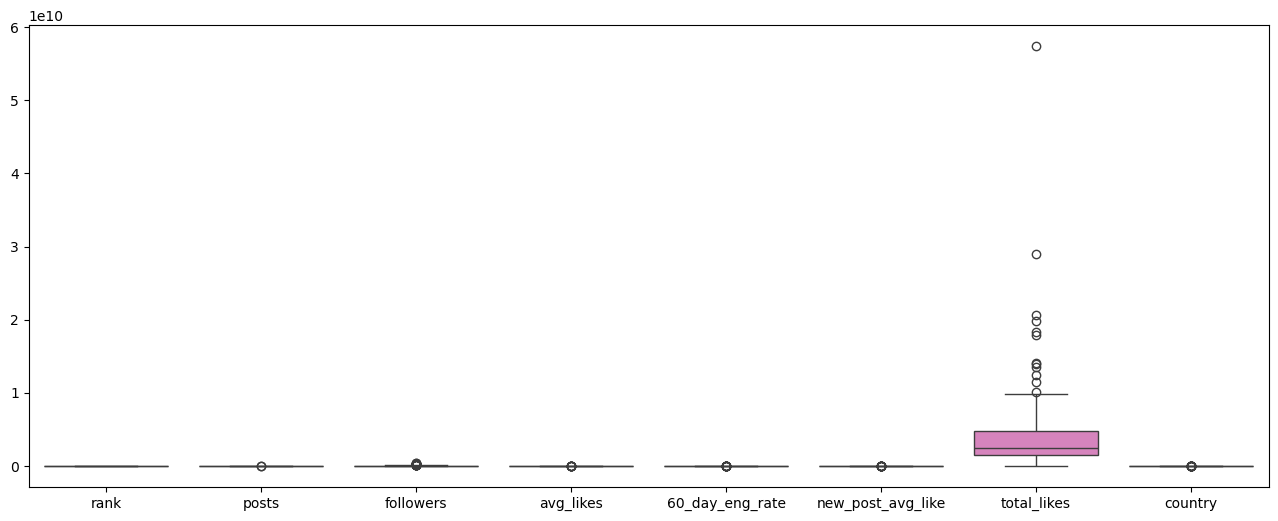

In [18]:
# Box plot das variáveis
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df)

In [19]:
# Padronização dos dados
# Utilizando o standard Scalling para padronizar os dados

obj_padronizacao = StandardScaler().fit(df)

# Aplicando a padronização no dataframe
df_padronizado = obj_padronizacao.transform(df)

# Tranformando em um dataframe
df_padronizado = pd.DataFrame(df_padronizado)

# Nomeando as colunas
df_padronizado.columns = ['rank', 'posts', 'followers', 'avg_likes', '60_day_eng_rate',
       'new_post_avg_like', 'total_likes', 'country' ]


In [20]:
# Normalizando os dados 
obj_normalizacao = MinMaxScaler().fit(df)

# Aplicando a normalização nos dataframe
df_normalizado = obj_normalizacao.transform(df)

# Transformando em um dataframe
df_normalizado = pd.DataFrame(df_normalizado)

# Nomeando as colunas
df_normalizado.columns = ['rank', 'posts', 'followers', 'avg_likes', '60_day_eng_rate',
       'new_post_avg_like', 'total_likes', 'country']

df_normalizado.columns


Index(['rank', 'posts', 'followers', 'avg_likes', '60_day_eng_rate',
       'new_post_avg_like', 'total_likes', 'country'],
      dtype='object')

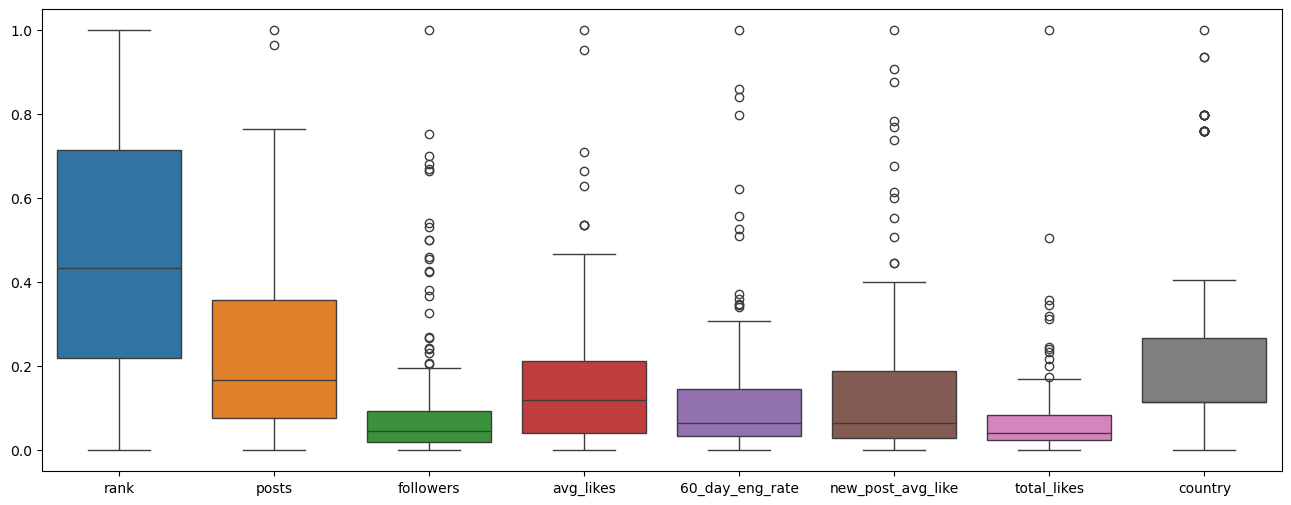

In [21]:
# Box plot das variáveis
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_normalizado)

In [22]:
df_normalizado.describe()

,rank,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,0.468593,0.231043,0.119266,0.168710,0.129158,0.151778,0.075872,0.245301
std,0.300894,0.205190,0.185895,0.180907,0.177535,0.206617,0.114394,0.262186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.218593,0.075775,0.019752,0.041144,0.032715,0.027858,0.024563,0.113924
50%,0.434673,0.167623,0.046614,0.119851,0.064453,0.065315,0.041569,0.113924
75%,0.713568,0.358496,0.092156,0.212498,0.144531,0.188462,0.082994,0.265823
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df_padronizado.describe()

,rank,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
count,1.320000e+02,1.320000e+02,1.320000e+02,132.000000,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02
mean,5.382900e-17,5.551115e-17,5.382900e-17,0.000000,-8.074349e-17,2.691450e-17,-8.074349e-17,3.027881e-17
std,1.003810e+00,1.003810e+00,1.003810e+00,1.003810,1.003810e+00,1.003810e+00,1.003810e+00,1.003810e+00
min,-1.563268e+00,-1.130284e+00,-6.440209e-01,-0.936134,-7.302786e-01,-7.373846e-01,-6.657758e-01,-9.391637e-01
25%,-8.340225e-01,-7.595859e-01,-5.373643e-01,-0.707835,-5.453037e-01,-6.020436e-01,-4.502323e-01,-5.029923e-01
50%,-1.131588e-01,-3.102552e-01,-3.923114e-01,-0.271109,-3.658504e-01,-4.200629e-01,-3.010064e-01,-5.029923e-01
75%,8.172582e-01,6.235102e-01,-1.463919e-01,0.242970,8.692399e-02,1.782181e-01,6.249275e-02,7.856960e-02
max,1.772822e+00,3.761804e+00,4.755848e+00,4.612640,4.923880e+00,4.120915e+00,8.109216e+00,2.889452e+00


In [24]:
df_padronizado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               132 non-null    float64
 1   posts              132 non-null    float64
 2   followers          132 non-null    float64
 3   avg_likes          132 non-null    float64
 4   60_day_eng_rate    132 non-null    float64
 5   new_post_avg_like  132 non-null    float64
 6   total_likes        132 non-null    float64
 7   country            132 non-null    float64
dtypes: float64(8)
memory usage: 8.4 KB


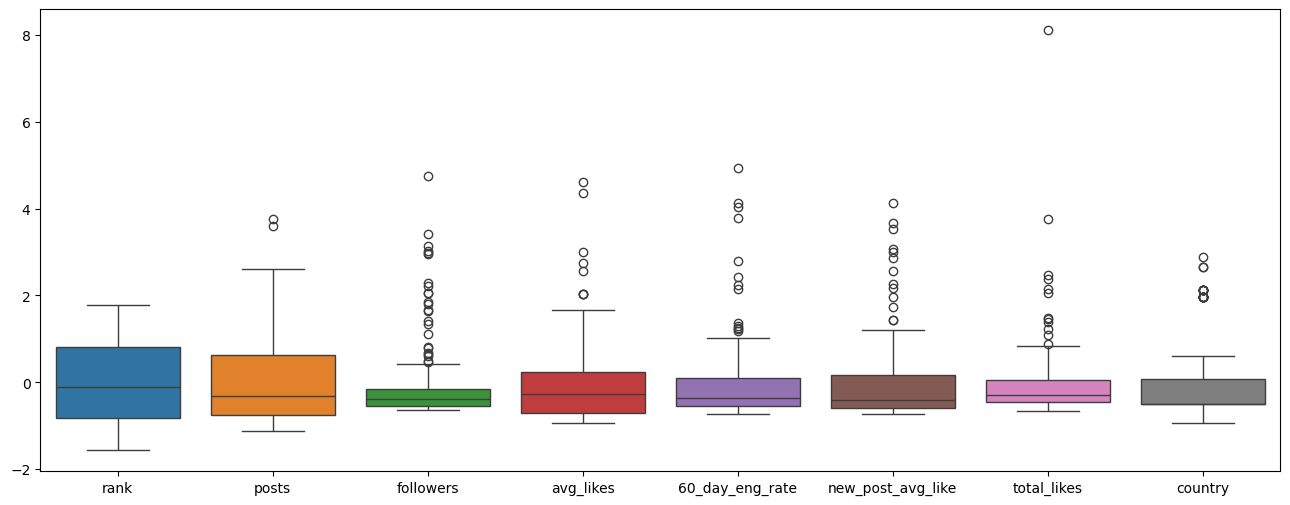

In [25]:
# Box plot das variáveis
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_padronizado)

# Análise Gráfica

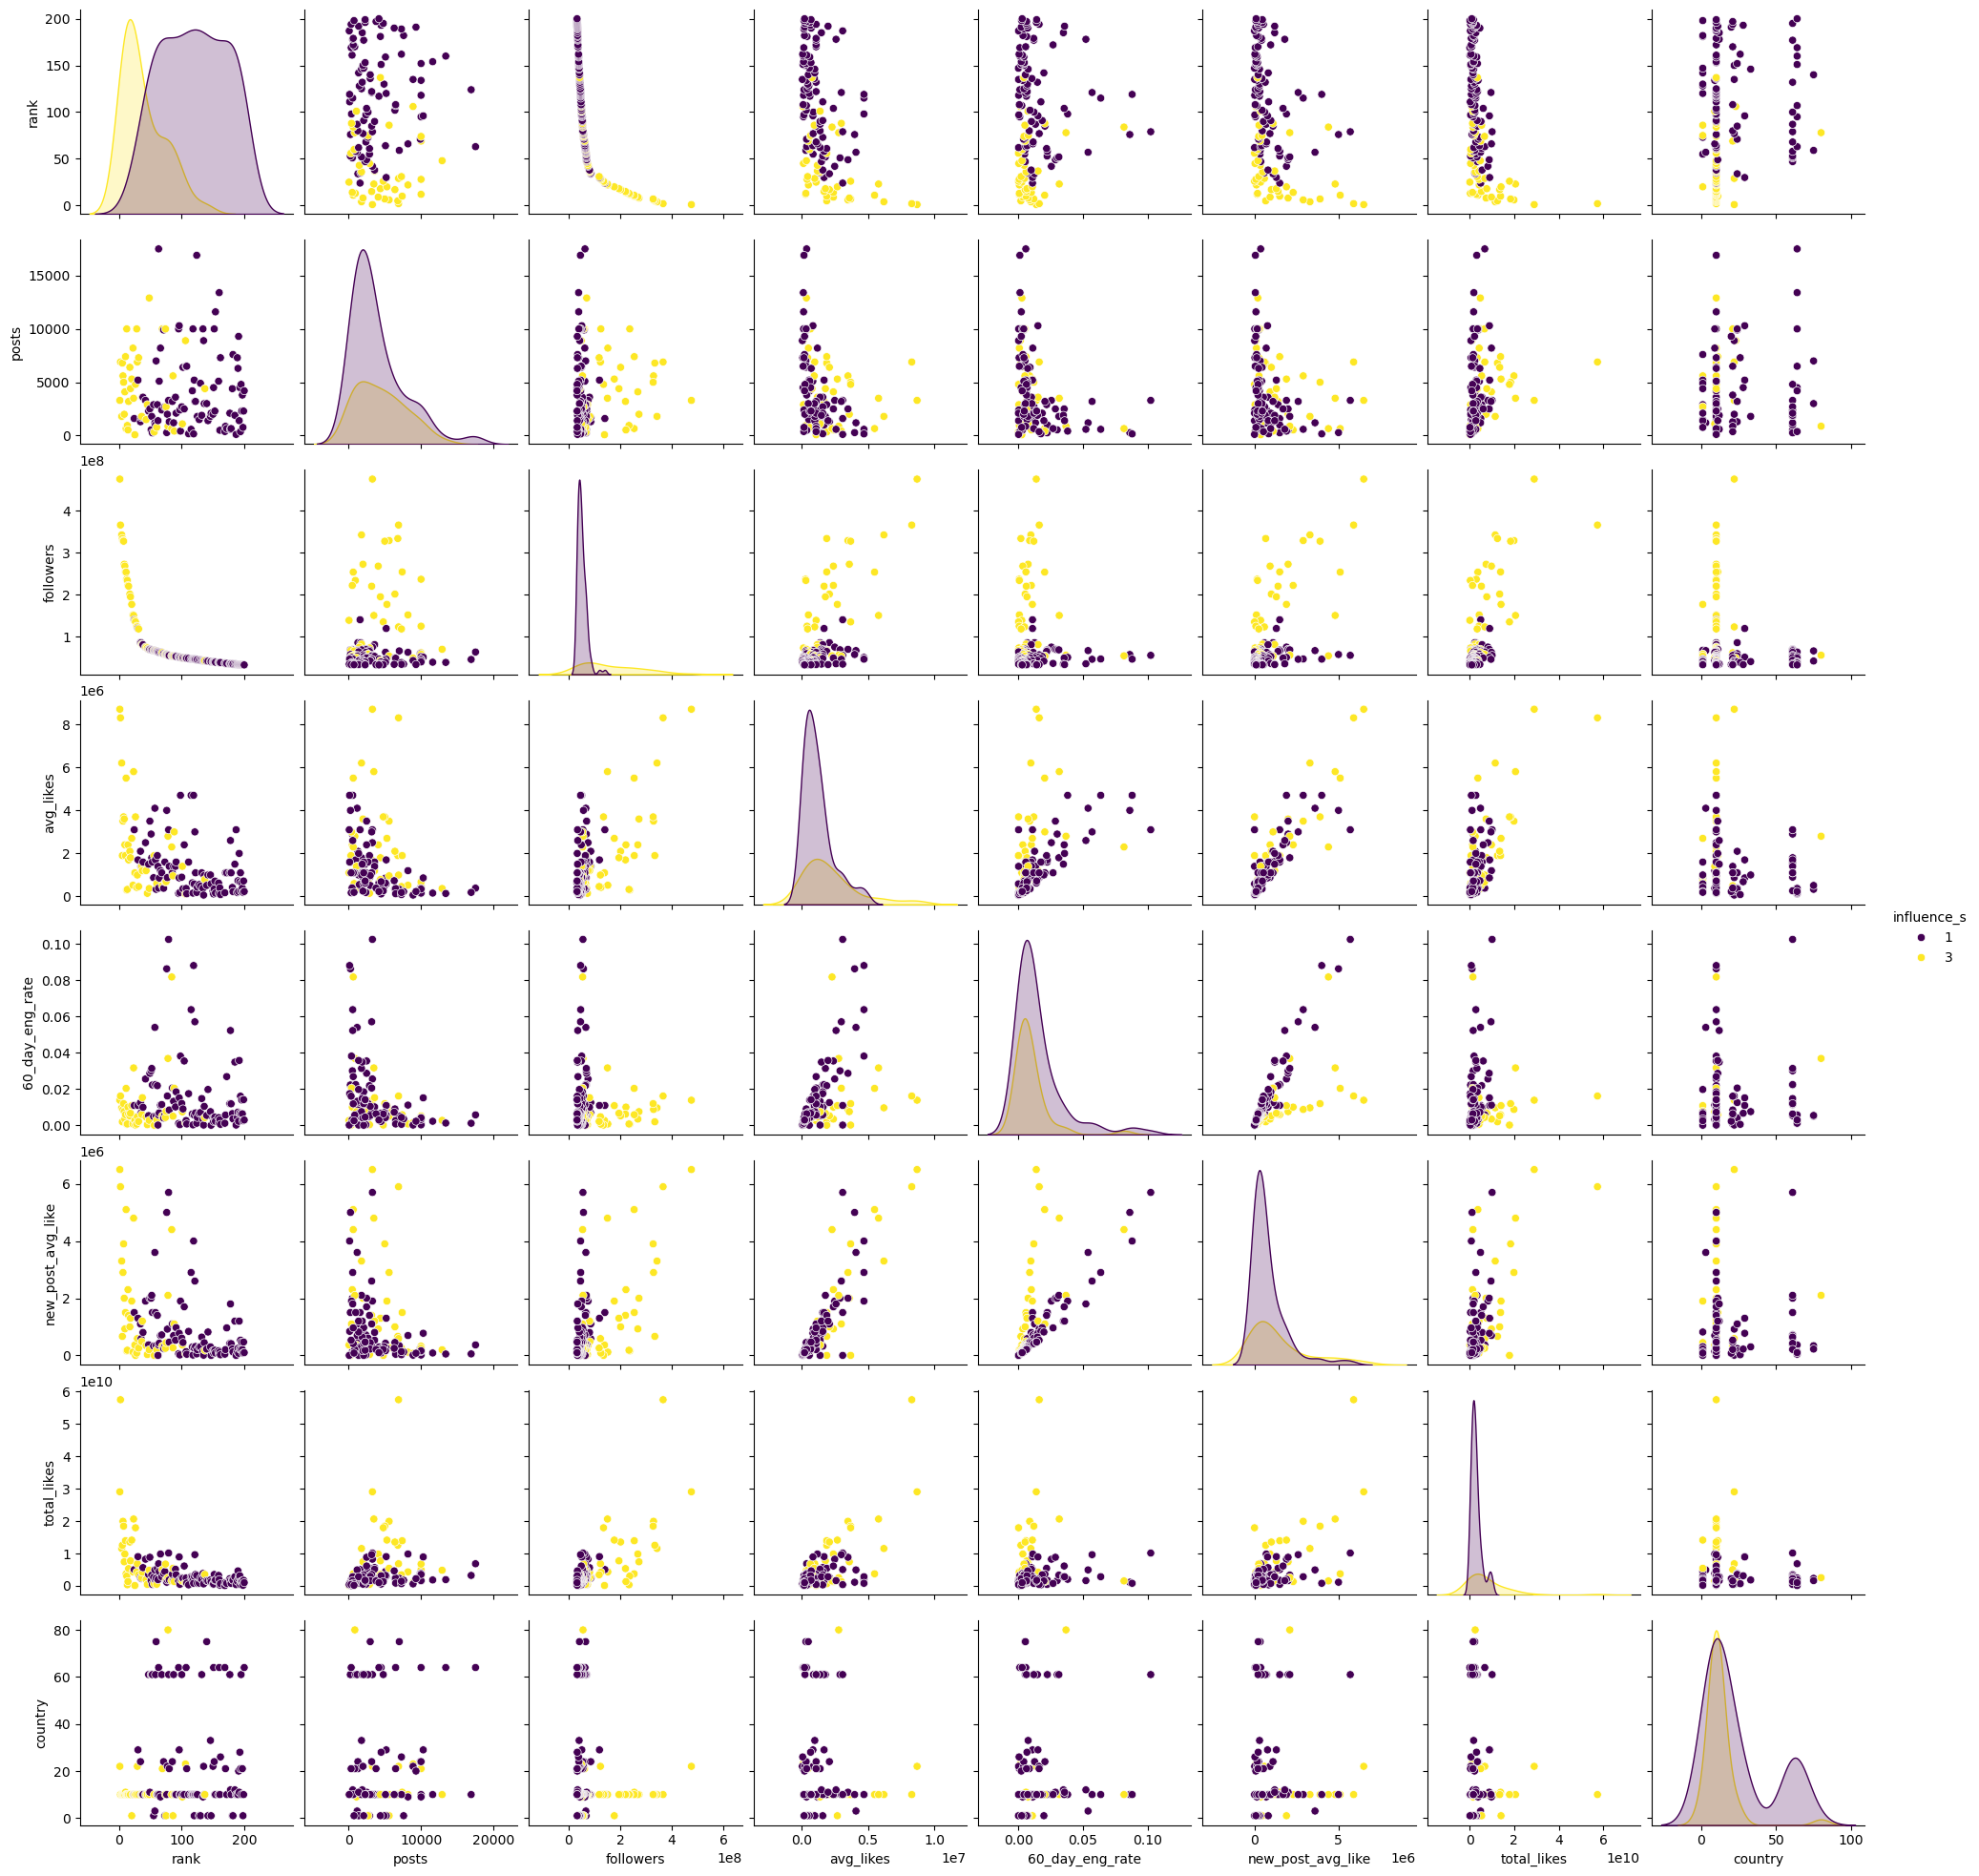

In [26]:
sns.pairplot(df_temp,kind='scatter', hue='influence_s', palette='viridis')

# Treinamento da rede usando KNN 

In [27]:
from sklearn import preprocessing, model_selection, neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score

In [28]:
X = np.array(df_padronizado)
y = np.array(df_temp['influence_s'])

##### Separando os dados de treino e teste

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y , test_size=0.3, random_state=1)

In [30]:
k = 3
clf = KNeighborsClassifier(n_neighbors= k, metric='euclidean')

In [31]:
knn = clf.fit(X_train, y_train)

In [32]:
y_pred = clf.predict(X_test)

# Métricas de avaliação

In [33]:
print('A acurácia do modelo nos testes: ' , accuracy_score(y_test, y_pred))

A acurácia do modelo nos testes:  0.85


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89        28
           3       0.75      0.75      0.75        12

    accuracy                           0.85        40
   macro avg       0.82      0.82      0.82        40
weighted avg       0.85      0.85      0.85        40



In [35]:
confusion_matrix(y_test, y_pred)

array([[25,  3],
       [ 3,  9]], dtype=int64)

In [36]:
def knn_comparison(data, k):
    x = data[['new_post_avg_like','rank']].values
    y = data['influence_s'].astype(int).values
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    plot_decision_regions(x, y, clf=knn)
    plt.xlabel('new_post_avg_like')
    plt.ylabel('rank')
    plt.title('K='+ str(k))
    plt.show()

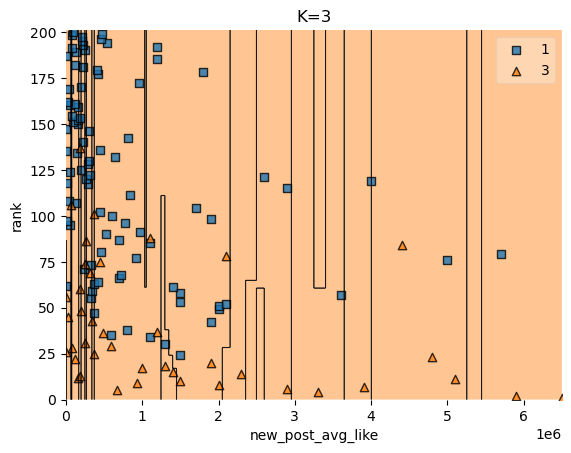

In [37]:
knn_comparison(df_temp, k)

<Axes: xlabel='new_post_avg_like', ylabel='rank'>

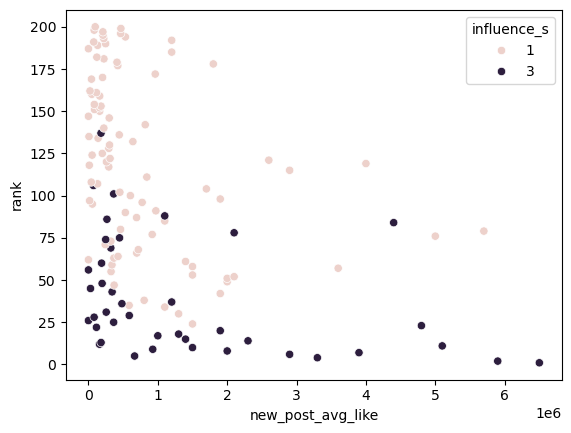

In [38]:
sns.scatterplot(data=df_temp, x= 'new_post_avg_like', y='rank', hue='influence_s')

In [39]:
k_valores = [i for i in range(1,30)]
scores = []
for k in k_valores:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=4)
    scores.append(np.mean(score))


Text(0, 0.5, 'Acurácia score')

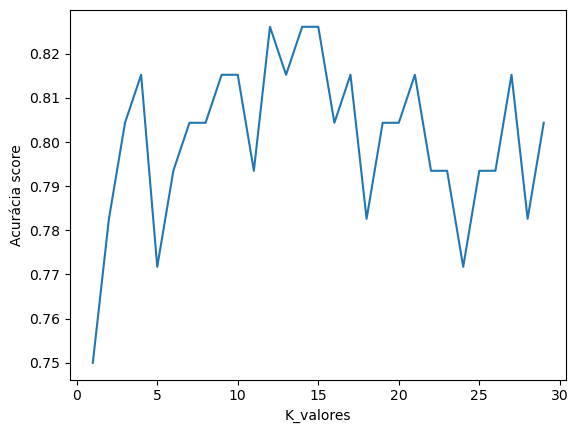

In [40]:
sns.lineplot(x= k_valores, y= scores, markers= '0')
plt.xlabel('K_valores')
plt.ylabel('Acurácia score')